<h1 style='text-align: left; color:darkblue'>Data Reduction and Regression Methods</h1>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the datasets
drug_cost = pd.read_csv('/Users/williamjowens/Desktop/ANA 620/Week 4/HW4_DrugCost.csv')

un_study = pd.read_csv('/Users/williamjowens/Desktop/ANA 620/Week 4/HW4_UN1.csv')

In [3]:
drug_cost.head()

,COST,RXPM,GS,RI,COPAY,AGE,F,MM,ID
0,1.34,4.2,36,45.6,10.87,29.7,52.3,1158096,MN1
1,1.34,5.4,37,45.6,8.66,29.7,52.3,1049892,MN2
2,1.38,7.0,37,45.6,8.12,29.7,52.3,96168,MN3
3,1.22,7.1,40,23.6,5.89,28.7,53.4,407268,GA
4,1.08,3.5,40,23.6,6.05,28.7,53.4,13224,GA2


In [4]:
drug_cost.shape

(29, 9)

In [5]:
un_study.head()

,Fertility,PPgdp,LogFertility,LogPPgdp
0,6.80,98,1.916923,4.584967
1,2.28,1317,0.824175,7.183112
2,2.80,1784,1.029619,7.486613
3,7.20,739,1.974081,6.605298
4,2.44,7163,0.891998,8.876684


In [6]:
un_study.shape

(193, 4)

# Scatterplot Matrix

<Figure size 600x500 with 0 Axes>

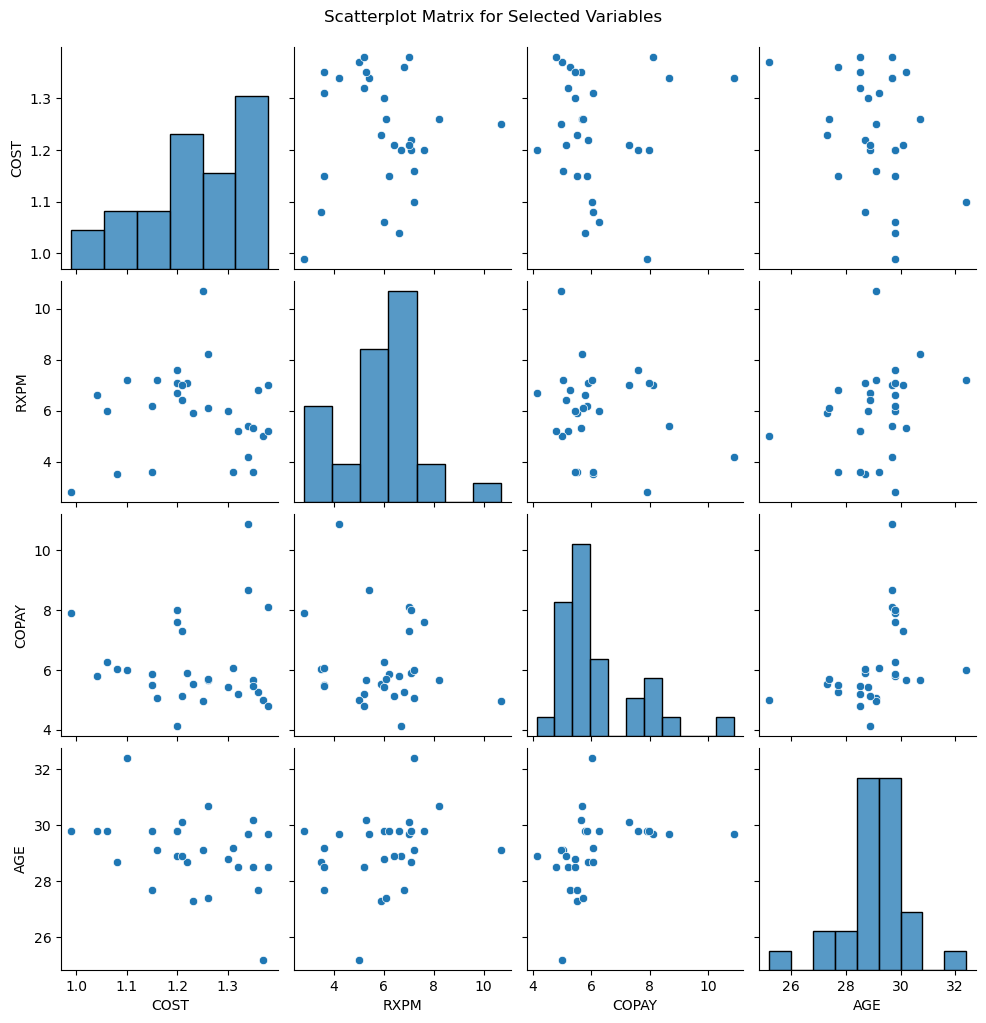

In [7]:
# Select variables
selected_vars = ['COST', 'RXPM', 'COPAY', 'AGE']

# Scatterplot matrix
plt.figure(figsize=(6,5))
sns.pairplot(drug_cost, vars=selected_vars)
plt.suptitle('Scatterplot Matrix for Selected Variables', y=1.02)
plt.show()

### Interpretation - Observed Relationships
We created and inspected a scatterplot matrix of the following continuous variables: COST, RXPM, COPAY, and AGE. Upon examining the scatterplot matrix, we noticed that the COST variable has weak relationships with the other variables as evidenced by the highly scattered points. This means that changes in the values of the other variables are not particularly associated with changes in the COST variable. If any relationship is present, it may be in a positive direction for COST vs. RXPM and COST vs. COPAY, but a potentially negative direction for COST vs. AGE. However, it should be noted that the trajectory of the plotted relationships is not very clear. Increases in RXPM and COPAY may be very weakly associated with increases in COST, and increases in AGE may be very weakly associated with decreases in COST. A key insight from this information is that as the number of prescriptions per member per year (RXPM) increases, the average cost to plan for 1 prescription for 1 day (COST) also rises.

The relationship between RXPM and COPAY appears to be weak and negative as evidenced by the high dispersion and downward trajectory of the points. In contrast, RXPM and AGE appear to be weakly and positively associated. As COPAY increases, RXPM decreases. In addition, as AGE increases, RXPM increases. This last observation is quite reasonable given that RXPM represents the number of prescriptions per member per year. Older members may be more likely to consume greater amounts of prescriptions drugs due to the greater incidence of health issues among older populations. In terms of the association between COPAY and AGE, it appears that a weak, positive trend exists. As members get older, the average prescription copayment (COPAY) may increase as well.

In [8]:
# Correlation matrix
corr_matrix = drug_cost.corr(numeric_only=True)
corr_matrix

,COST,RXPM,GS,RI,COPAY,AGE,F,MM
COST,1.000000,0.016223,-0.570670,-0.040920,0.009660,-0.348911,0.375960,-0.080268
RXPM,0.016223,1.000000,0.259519,0.101041,-0.183411,0.259938,-0.116373,0.022899
GS,-0.570670,0.259519,1.000000,0.103097,-0.031740,0.062278,-0.182934,0.142892
RI,-0.040920,0.101041,0.103097,1.000000,0.758398,0.424226,-0.216573,0.321264
COPAY,0.009660,-0.183411,-0.031740,0.758398,1.000000,0.373081,-0.152190,0.254303
AGE,-0.348911,0.259938,0.062278,0.424226,0.373081,1.000000,-0.365498,0.263567
F,0.375960,-0.116373,-0.182934,-0.216573,-0.152190,-0.365498,1.000000,-0.262588
MM,-0.080268,0.022899,0.142892,0.321264,0.254303,0.263567,-0.262588,1.000000


In [9]:
# Correlations by COST
corr_cost = corr_matrix['COST']

# Sorted by absolute magnitude
sorted_corr = corr_cost.iloc[corr_cost.abs().argsort()[::-1]]
sorted_corr

COST     1.000000
GS      -0.570670
F        0.375960
AGE     -0.348911
MM      -0.080268
RI      -0.040920
RXPM     0.016223
COPAY    0.009660
Name: COST, dtype: float64

# Estimates and Standard Errors

In [10]:
# Mean of COST
mean_COST = drug_cost['COST'].mean()

print(f'Mean of COST: {mean_COST}')

Mean of COST: 1.233448275862069


In [11]:
# Standard error for mean of COST
se_mean_COST = drug_cost['COST'].sem()

print(f'Standard Error of COST Mean: {se_mean_COST}')

Standard Error of COST Mean: 0.020434178012620652


### Interpretation - Mean and SE
The mean of the COST variable, which represents the average cost to plan for 1 prescription for 1 day, is 1.23 USD. The standard error of the COST mean is 0.02 USD. There appears to be very little variability associated with the COST mean. This indicates that the sample mean is more likely to be an accurate reflection of the population mean. Low variability may also suggest that the average COST is fairly consistent across different prescription plans. Ultimately, we may obtain more stable estimates based on the relatively low variability of the sample data.

In [12]:
# Variance of AGE
variance_AGE = drug_cost['AGE'].var()

print(f'Variance of AGE: {variance_AGE}')

Variance of AGE: 1.6612315270935964


In [13]:
# Standard error for variance of AGE
n = len(drug_cost)
se_variance_AGE = variance_AGE * np.sqrt(2 / (n - 1))

print(f'Standard Error of AGE Variance: {se_variance_AGE}')

Standard Error of AGE Variance: 0.4439828010351079


### Interpretation - Variance and SE
The variance of the AGE variable, which represents the average age of the member, is 1.66 years. The standard error of the AGE variance is 0.44 years. Based on this information, it appears that the members involved in the research do not vary much, on average, in terms of age. The standard error also suggests that our sample variance is a reliable estimate of the true population variance. Given the low variance metric, it is possible that the sample may have been taken from a particular population of individuals (people in a similar age range). The conclusions that we draw about the population may be restricted to people in the age range under study. We may not be able to generalize conclusions to people of significantly different ages.

# Principal Component Analysis

Principal component analysis is a dimensionality reduction technique that aims to reduce the number of features used for modeling while retaining most of the information that these features represent. Features are reduced via transformation into linear orthogonal components that are not correlated with one another. The information retained by these principal components is expressed as explained variance. The first component will represent the largest variance, the second component will represent the second largest variance, and so on. Typically the first two to three components represent a large enough proportion of explained variance and are subsequently used for modeling. While this can solve issues of high dimensionality, the modeling results will be less interpretable in terms of relating the results back to the original features.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exclude COST and standardize data
scaled_data = StandardScaler().fit_transform(drug_cost.drop(columns=['COST', 'ID']))

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.35002378 0.20298292 0.12923826 0.12229885 0.10071301 0.06821037
 0.02653281]


In [15]:
# View components in a dataframe
selected_variables = drug_cost.drop(columns=['COST', 'ID'])
components = [f'Component {i}' for i in range(1, pca.n_components_ + 1)]

components_df = pd.DataFrame(pca.components_.T, index=selected_variables.columns, columns=components)
components_df

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7
RXPM,-0.117719,-0.626312,-0.536601,-0.035515,-0.299052,-0.388733,0.253235
GS,-0.146420,-0.523589,0.301800,-0.649030,0.320303,0.298372,0.021734
RI,-0.532281,0.206812,-0.213991,-0.293610,0.037418,-0.312194,-0.665613
COPAY,-0.476768,0.441094,-0.114237,-0.225152,0.167884,-0.064927,0.694251
AGE,-0.456784,-0.132635,-0.314480,0.376971,-0.034598,0.724360,-0.082803
F,0.338132,0.277088,-0.361237,-0.546093,-0.496534,0.364617,-0.026212
MM,-0.362060,-0.043395,0.576839,0.016556,-0.728454,-0.023155,0.053207


In [16]:
# First component
first_component = components_df.iloc[:, 0].sort_values(key=np.abs, ascending=False)

print(f'Component 1:\n{first_component}')

Component 1:
RI      -0.532281
COPAY   -0.476768
AGE     -0.456784
MM      -0.362060
F        0.338132
GS      -0.146420
RXPM    -0.117719
Name: Component 1, dtype: float64


In [17]:
# Second component
second_component = components_df.iloc[:, 1].sort_values(key=np.abs, ascending=False)

print(f'Component 2:\n{second_component}')

Component 2:
RXPM    -0.626312
GS      -0.523589
COPAY    0.441094
F        0.277088
RI       0.206812
AGE     -0.132635
MM      -0.043395
Name: Component 2, dtype: float64


In [18]:
# Third component
third_component = components_df.iloc[:, 2].sort_values(key=np.abs, ascending=False)

print(f'Component 3:\n{third_component}')

Component 3:
MM       0.576839
RXPM    -0.536601
F       -0.361237
AGE     -0.314480
GS       0.301800
RI      -0.213991
COPAY   -0.114237
Name: Component 3, dtype: float64


In [19]:
# Variance represented by first three principal components
print(f'Variance represented by Component 1: {explained_variance[0]}')
print(f'Variance represented by Component 2: {explained_variance[1]}')
print(f'Variance represented by Component 3: {explained_variance[2]}')

Variance represented by Component 1: 0.3500237761044804
Variance represented by Component 2: 0.20298292451236383
Variance represented by Component 3: 0.12923825782636478


In [20]:
# Total variance represented by first three principal components
explained_variance_three = explained_variance[:3].sum()

print(f'Total variance represented by first three principal components: {explained_variance_three}')

Total variance represented by first three principal components: 0.682244958443209


### Interpretation - First Three Components
The first three components represent 68.22% of the total explained variance. If we use these three components in our modeling efforts, we will have effectively reduced the dimensionality of our data while retaining a fairly large proportion of the original information. However, we should explore the possibility of including another principal component as this may allow us to capture a decent amount of additional variance at the small cost of adding one more feature to our model.

In [21]:
# Get eigenvalues
eigenvalues_pca = pca.explained_variance_
print(eigenvalues_pca)

[2.53767238 1.4716262  0.93697737 0.88666667 0.73016931 0.49452521
 0.19236286]


In [22]:
# Components with eigenvalues over or close to 1 (> or = 0.80)
eigenvalues_qualified = [eig for eig in eigenvalues_pca if eig >= 0.80]
eigenvalues_qualified

[2.5376723767574836,
 1.4716262027146383,
 0.9369773692411449,
 0.8866666677091105]

In [23]:
# Print components with eigenvalues over or close to 1
print(f'Eigenvalues Over or Close to 1:')
print(f'Component 1: {round(eigenvalues_qualified[0], 2)}')
print(f'Component 2: {round(eigenvalues_qualified[1], 2)}')
print(f'Component 3: {round(eigenvalues_qualified[2], 2)}')
print(f'Component 4: {round(eigenvalues_qualified[3], 2)}')

Eigenvalues Over or Close to 1:
Component 1: 2.54
Component 2: 1.47
Component 3: 0.94
Component 4: 0.89


In [24]:
# Cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)
print(f'Total variance represented by first four principal components: {cumulative_variance[3]}')

[0.35002378 0.5530067  0.68224496 0.80454381 0.90525682 0.97346719
 1.        ]
Total variance represented by first four principal components: 0.804543809161707


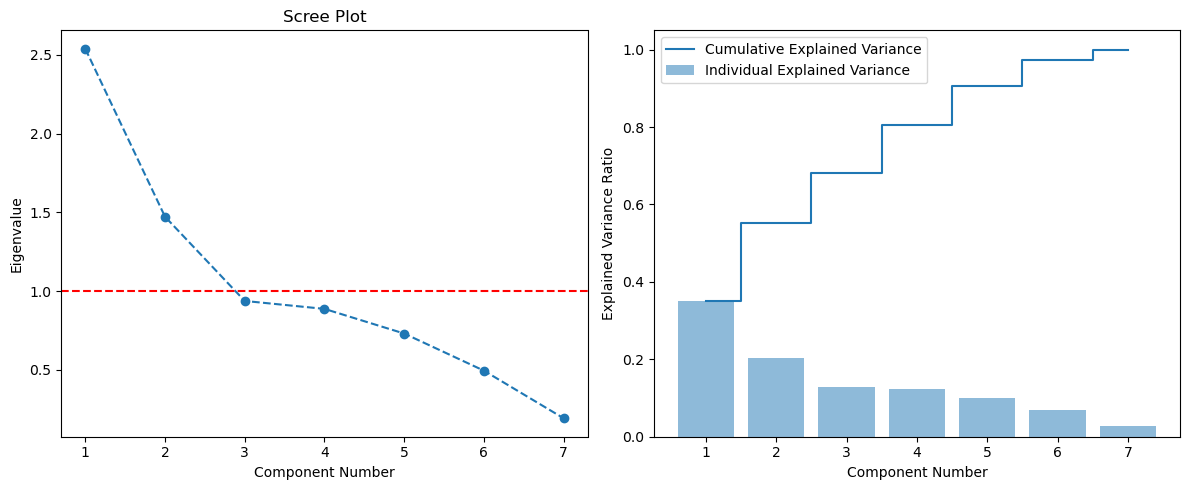

In [25]:
# Scree Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues_pca) + 1), eigenvalues_pca, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Criterion line

# Variance Explained Plot
plt.subplot(1, 2, 2)
plt.bar(range(1,len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1,len(cumulative_variance)+1), cumulative_variance, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Component Number')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Interpretation - Eigenvalues and Plots
There appear to be four principal components that have eigenvalues more than or very close to one (criterion is greater than 0.80). Including a fourth principal component will allow us to capture 80% of the explained variance as opposed to 68%. This sizable increase in variance at the cost of an additional dimension seems like a reasonable trade-off. Consequently, we have decided to use four principal components for modeling purposes.

In [26]:
# Set up principal components for modeling
selected_components = principal_components[:, :4]
X_pca = selected_components

In [27]:
# Model with components - compare after FA modeling
X_pca = sm.add_constant(X_pca)

y_pca = drug_cost['COST']

model_pca = sm.OLS(y_pca, X_pca).fit()

model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   COST   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     2.265
Date:                Sun, 29 Oct 2023   Prob (F-statistic):             0.0919
Time:                        04:03:08   Log-Likelihood:                 28.004
No. Observations:                  29   AIC:                            -46.01
Df Residuals:                      24   BIC:                            -39.17
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2334      0.019     65.590      0.000       1.195       1.272
x1             0.0183      0.012      1.522      0.141      -0.007       0.043
x2             0.0334      0.016      2.115      0.045       0.001       0.066
x3            -0.0294      0.020     -1.485      0.151      -0.070       0.011
x4             0.0052      0.020      0.258      0.799      -0.037       0.047
==============================================================================
Omnibus:                        4.858   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                3.340
Skew:                          -0.794   Prob(JB):                        0.188
Kurtosis:                       3.493   Cond. No.                         1.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Factor Analysis

Factor analysis is a technique that aims to identify latent factors underlying certain variable relationships. Essentially, factor analysis allows us to discover hidden variables that may be influencing the observed variables. This method can be used for dimensionality reduction, but the goal is to reduce dimensions via the identification of latent factors that can explain the data rather than via the maximization of explained variance with orthogonal transformation. One advantage of factor analysis over PCA is that the resulting features (the factors) are more interpretable in terms of the original variables that the factors were derived from.

In [28]:
from factor_analyzer import FactorAnalyzer

# Perform factor analysis with max factors
fa = FactorAnalyzer(n_factors=scaled_data.shape[1], rotation="varimax")
fa.fit(scaled_data)

# Get eigenvalues
eigenvalues, common_factor_eigenvalues = fa.get_eigenvalues()

# View eigenvalues as a dataframe
eigenvalues_df = pd.DataFrame({
    'Factor Eigenvalues': eigenvalues,
    'Common Factor EVs': common_factor_eigenvalues
    })
eigenvalues_df.index = [f'Factor {i+1}' for i in range(len(eigenvalues))]

# Transposed view
eigenvalues_df = eigenvalues_df.T
eigenvalues_df

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
Factor Eigenvalues,2.450166,1.42088,0.904668,0.856092,0.704991,0.477473,0.185730
Common Factor EVs,2.174666,1.02793,0.404353,0.350047,0.101122,0.047432,-0.000005


In [29]:
# Get loadings
loadings = fa.loadings_

# Make a dataframe
loadings_df = pd.DataFrame(loadings, 
                           columns=[f'Factor {i+1}' for i in range(loadings.shape[1])], 
                           index=drug_cost.drop(columns=['COST', 'ID']).columns)

loadings_df

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
RXPM,-0.046674,0.100313,0.731124,0.228360,-0.021364,-0.003960,0.0
GS,0.003732,0.096489,0.170340,0.557834,0.091417,-0.010044,0.0
RI,0.848475,0.155952,0.157741,0.062450,0.239155,-0.130791,0.0
COPAY,0.910970,0.161484,-0.200897,-0.036535,0.059151,0.152124,0.0
AGE,0.329154,0.594426,0.336412,-0.115638,0.142438,0.211502,0.0
F,-0.078544,-0.576220,-0.028916,-0.193136,-0.151153,0.055787,0.0
MM,0.202769,0.267996,-0.025329,0.145578,0.431522,0.006669,0.0


In [30]:
# First factor
first_factor = loadings_df.iloc[:, 0].sort_values(key=np.abs, ascending=False)

print(f'Factor 1:\n{first_factor}')

Factor 1:
COPAY    0.910970
RI       0.848475
AGE      0.329154
MM       0.202769
F       -0.078544
RXPM    -0.046674
GS       0.003732
Name: Factor 1, dtype: float64


In [31]:
# Second factor
second_factor = loadings_df.iloc[:, 1].sort_values(key=np.abs, ascending=False)

print(f'Factor 2:\n{second_factor}')

Factor 2:
AGE      0.594426
F       -0.576220
MM       0.267996
COPAY    0.161484
RI       0.155952
RXPM     0.100313
GS       0.096489
Name: Factor 2, dtype: float64


In [32]:
# Third factor
third_factor = loadings_df.iloc[:, 2].sort_values(key=np.abs, ascending=False)

print(f'Factor 3:\n{third_factor}')

Factor 3:
RXPM     0.731124
AGE      0.336412
COPAY   -0.200897
GS       0.170340
RI       0.157741
F       -0.028916
MM      -0.025329
Name: Factor 3, dtype: float64


In [33]:
# Variance represented by first three factors
variance, proportion_var, cumulative_var = fa.get_factor_variance()

print(f'Variance represented by Factor 1: {proportion_var[0]}')
print(f'Variance represented by Factor 2: {proportion_var[1]}')
print(f'Variance represented by Factor 3: {proportion_var[2]}')

Variance represented by Factor 1: 0.2439421022252035
Variance represented by Factor 2: 0.11813773101949547
Variance represented by Factor 3: 0.10620716895961248


In [34]:
# Total variance represented by first three factors
explained_variance_three_fa = proportion_var[:3].sum()

print(f'Total variance represented by first three factors: {explained_variance_three_fa}')

Total variance represented by first three factors: 0.4682870022043114


### Interpretation - First Three Factors
The first three factors represent 46.83% of the total explained variance. This is a relatively low to moderate amount of explained variance and it certainly less than the variance captured by PCA. However, maximizing explained variance is not the primary goal of factor analysis, as discussed earlier. By examining the factors and their loadings in relation to the associated variables, we can investigate whether some hidden variables may exist in the data. For example, The first factor appears to be dominated by the COPAY and RI (restrictiveness index) variables. Perhaps someone with domain expertise in the pharmaceutical industry could derive some sort of meaningful factor from the combination of these two variables. The same goes for the other factors displayed above. While it is difficult for us to infer factors based on the results, an individual with more insider knowledge may be able to derive useful latent variables from the information. In some cases, researchers may be less conservative and utilize factors with eigenvalues close to one rather than only factors with eigenvalues greater than one. We shall explore whether there are additional factors that may be relevant for subsequent modeling efforts.

In [35]:
# Factors with eigenvalues over or close to 1 (> or = 0.80)
eigenvalues_qualified = [eig for eig in eigenvalues if eig >= 0.80]
eigenvalues_qualified

[2.4501664327313604,
 1.4208804715865457,
 0.9046678047845536,
 0.8560919550294871]

In [36]:
# Print factors with eigenvalues over or close to 1
print(f'Eigenvalues Over or Close to 1:')
print(f'Factor 1: {round(eigenvalues_qualified[0], 2)}')
print(f'Factor 2: {round(eigenvalues_qualified[1], 2)}')
print(f'Factor 3: {round(eigenvalues_qualified[2], 2)}')
print(f'Factor 4: {round(eigenvalues_qualified[3], 2)}')

Eigenvalues Over or Close to 1:
Factor 1: 2.45
Factor 2: 1.42
Factor 3: 0.9
Factor 4: 0.86


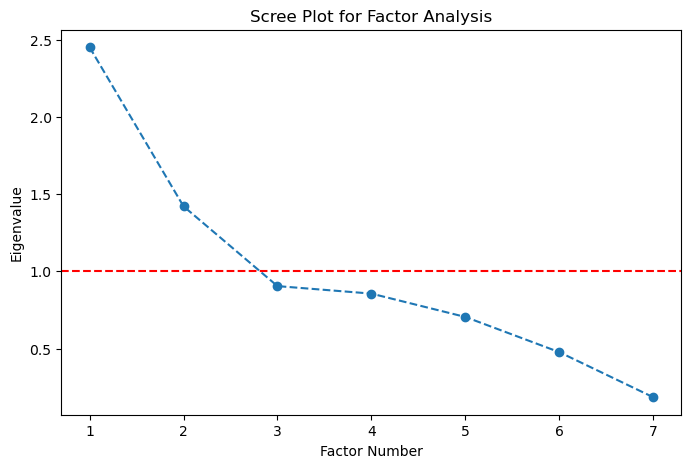

In [37]:
# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot for Factor Analysis')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Criterion line
plt.xticks(range(1, len(eigenvalues) + 1))
plt.show()

### Interpretation - Eigenvalues and Plot
Based on the results of the eigenvalue analysis and scree plot, it appears that there are four factors with eigenvalues greater than or close to zero (the cutoff used was 0.80). We will proceed to observe these four factors more closely.

In [38]:
# Re-instantiate factor analyzer with desired number of factors (four factors)
factors_qualified = sum(eig >= 0.80 for eig in eigenvalues)

fa = FactorAnalyzer(n_factors=factors_qualified, rotation="varimax")
fa.fit(scaled_data)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [39]:
# Get loadings and communalities
loadings = fa.loadings_
communalities = fa.get_communalities()

# Make a dataframe
loadings_df = pd.DataFrame(loadings, 
                           columns=[f"Factor {i+1}" for i in range(loadings.shape[1])], 
                           index=drug_cost.drop(columns=['COST', 'ID']).columns)

# Add communalities
loadings_df['Communality'] = communalities

# Get variance and percentage variance explained by each factor
variance, proportion_var, cumulative_var = fa.get_factor_variance()

# Create another dataframe
variance_df = pd.DataFrame([variance, proportion_var, cumulative_var], 
                           columns=[f"Factor {i+1}" for i in range(loadings.shape[1])], 
                           index=['Variance', 'Variance %', 'Cum. Var'])

# Combine the dataframes
fa_table = pd.concat([loadings_df, variance_df])
fa_table

,Factor 1,Factor 2,Factor 3,Factor 4,Communality
RXPM,-0.057807,0.929559,0.143033,0.121932,0.902748
GS,0.000909,0.235022,-0.056268,0.403124,0.220911
RI,0.930229,0.119022,0.135640,0.203190,0.939176
COPAY,0.796400,-0.187271,0.207513,0.057614,0.715704
AGE,0.279777,0.149010,0.808670,0.179859,0.786775
F,-0.078502,-0.018020,-0.313217,-0.486828,0.341594
MM,0.239631,-0.037539,0.161346,0.398326,0.243528
Variance,1.644781,0.992491,0.863169,0.649996,NaN
Variance %,0.234969,0.141784,0.123310,0.092857,NaN
Cum. Var,0.234969,0.376753,0.500063,0.592920,NaN


### Interpretation - Four Factors
After performing the factor analysis again with four factors specified, the explained variance results appear to have changed slightly. When four factors are specified rather than seven, the first three factors actually capture around 50% of the explained variance. The first four factors account for 59.29%. The change in percentage of variance explained is logical since the eigenvalues of factors five through seven have been removed from the equation, meaning each remaining factor will represent a larger proportion of the variance. The fourth factor appears to represent a concept where the F variable (percent of female members) decreases and the GS (percent generic substitution) and MM (member months as a measure of plan size) variables increase. The four factors have been prepared for modeling below.

In [40]:
# Set up factor scores for modeling
factor_scores = fa.transform(scaled_data)

selected_factors = factor_scores[:, :4]

X_fa = selected_factors

In [41]:
# Model with factors
X_fa = sm.add_constant(X_fa)

y_fa = drug_cost['COST']

model_fa = sm.OLS(y_fa, X_fa).fit()

model_fa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   COST   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     3.241
Date:                Sun, 29 Oct 2023   Prob (F-statistic):             0.0292
Time:                        04:03:09   Log-Likelihood:                 29.623
No. Observations:                  29   AIC:                            -49.25
Df Residuals:                      24   BIC:                            -42.41
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2334      0.018     69.356      0.000       1.197       1.270
x1             0.0167      0.019      0.890      0.383      -0.022       0.056
x2             0.0169      0.019      0.890      0.382      -0.022       0.056
x3            -0.0320      0.021     -1.508      0.145      -0.076       0.012
x4            -0.0837      0.029     -2.930      0.007      -0.143      -0.025
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                          -0.208   Prob(JB):                        0.873
Kurtosis:                       2.776   Cond. No.                         1.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion - Method Selection

#### Analysis Prior to Modeling
Principal components analysis and factor analysis have both allowed us to reduce the dimensionality of our data, which will certainly be useful during the modeling phase. High dimensionality can lead to overfitting, unreliable model estimates, and overall poor model performance. These issues may relegate our model to having little to no utility. Both methods, therefore, have great use to us. However, if we had to select one method, we would have to choose PCA for this particular case. Factor analysis relies on one having domain expertise to derive latent variables from the resulting factors. We simply do not have the domain-specific knowledge to readily derive meaningful hidden variables from the factor arrangements that were observed. The advantage of factor analysis is its greater interpretability. If we are unable to establish the factors in the first place, then this interpretability advantage is a moot point. While the PCA method is not very interpretable either, it still allows us to effectively capture a large amount of the original information, which we believe will be tremendously useful, given that our preferred goal would be to develop a highly performant predictive model. If our goal was to derive higher-order concepts that influence the data or if we understood the correlational structure of the factors better, then perhaps factor analysis would have been the preferred method. However, as it stands, we prefer the PCA method for its efficient and effective representation of the data, while simultaneously allowing us to reduce dimensionality and potentially obtain higher predictive performance.

#### Analysis After Modeling
We have observed some surprising results after deciding to revisit our PCA and Factor Analysis work and perform linear regression with our selected components and factors. The model obtained with the factor analysis features performed slightly better than the model obtained with the PCA features in terms of the R-squared and adjusted R-squared metrics (PCA: 0.274 and 0.153 vs. FA: 0.351 and 0.243). We had hypothesized that the PCA-based model would perform better in terms of the R-squared metrics, so this was unexpected for us. Although this comparison was interesting, there were pretty significant issues with both models. For example, both models only contained one predictor that was statistically significant. Despite these shared issues, there was no denying the fact that only one model had a statistically significant F-statistic. The factor-analysis-based model had a statistically significant F-statistic (0.029), whereas the PCA-based model did not (0.092). For the PCA-based model, we cannot reject the null hypothesis that all of the coefficients are zero and therefore the predictors have no effect on the response variable. In this head-to-head regression comparison, we decided to crown the model based on factor analysis as the winner based on the superior R-squared metrics and ability to reject the null hypothesis with respect to the F-statistic.

# Multiple Regression

In [42]:
# Load dataset again
drug_cost = pd.read_csv('/Users/williamjowens/Desktop/ANA 620/Week 4/HW4_DrugCost.csv')

In [43]:
import statsmodels.api as sm

# Define variables
X = drug_cost.drop(columns=['COST', 'ID'])
X = sm.add_constant(X)

y = drug_cost['COST']

# Fit the model
model = sm.OLS(y, X).fit()

# Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   COST   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     4.072
Date:                Sun, 29 Oct 2023   Prob (F-statistic):            0.00572
Time:                        04:03:09   Log-Likelihood:                 35.794
No. Observations:                  29   AIC:                            -55.59
Df Residuals:                      21   BIC:                            -44.65
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8507      0.764      2.424      0.024       0.263       3.439
RXPM           0.0224      0.011      2.037      0.054      -0.000       0.045
GS            -0.0114      0.003     -4.018      0.001      -0.017      -0.005
RI             0.0003      0.002      0.160      0.874      -0.004       0.005
COPAY          0.0147      0.019      0.787      0.440      -0.024       0.054
AGE           -0.0375      0.015     -2.517      0.020      -0.069      -0.007
F              0.0130      0.010      1.335      0.196      -0.007       0.033
MM          2.908e-08   4.16e-08      0.699      0.493   -5.75e-08    1.16e-07
==============================================================================
Omnibus:                        0.526   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.605
Skew:                           0.024   Prob(JB):                        0.739
Kurtosis:                       2.294   Cond. No.                     2.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation - Summary Table
The R-squared value of the OLS model is 0.576, indicating that the model explains 57.6% of the variability in the response variable (COST). The adjusted R-squared metric is a fair amount lower at 0.434. This discrepancy indicates that the model has been penalized quite a bit for including insignificant predictor variables. The F-statistic has a p-value of less than 0.05, allowing us to reject the null hypothesis that all coefficients are zero. At least one predictor variable has an influnce on the COST variable. Across all included predictors, the coefficients are very small. A one-unit change in any of the predictors will not result in much change to the response variable. Upon inspection of the coefficient p-values, it appears that five out of the seven predictor variables are statistically insignificant (below alpha level of 0.05). Only two variables, GS and AGE, were useful for explaining the variation in COST. Ultimately, the summary table statistics suggest that the model is a decent fit with decent R-squared and adjusted R-squared scores. However, the discrepancy between the two metrics and the high proportion of statistically insignificant predictors indicates that there is much room for improvement. We postulate that the removal of insignificant predictors may improve model fit.

In [44]:
# Get predictions
y_pred_ols = model.predict(X)

# OLS model metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

rss_ols = np.sum(model.resid**2)
mse_ols = mean_squared_error(y, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
mae_ols = mean_absolute_error(y, y_pred_ols)
mape_ols = mean_absolute_percentage_error(y, y_pred_ols)
aic_ols = model.aic
bic_ols = model.bic
log_likelihood_ols = model.llf

# Make a dataframe
metrics_df_ols = pd.DataFrame({
    'Metric': ['RSS', 'MSE', 'RMSE', 'MAE', 'MAPE', 'AIC', 'BIC', 'LogL'],
    'OLS Value': [rss_ols, mse_ols, rmse_ols, mae_ols, mape_ols, aic_ols, bic_ols, log_likelihood_ols]
})

metrics_df_ols

,Metric,OLS Value
0,RSS,0.143832
1,MSE,0.004960
2,RMSE,0.070425
3,MAE,0.057781
4,MAPE,0.047362
5,AIC,-55.587277
6,BIC,-44.648910
7,LogL,35.793638


### Interpretation - Metrics Table
The error metrics associated with the OLS model are quite small. This is indicative of the model fitting the data well, but such small errors also hint at the model being overfit. Perhaps the model can make decent estimations on our current data, but when faced with new data, it may not be able to generalize this high performance. The AIC and BIC will be discussed at a later point, when we compare the OLS model to a GLM model.

In [45]:
# Get studentized residuals
studentized_residuals = model.get_influence().resid_studentized_external

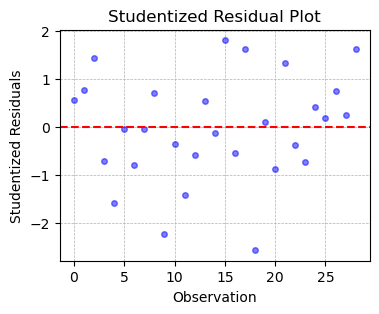

In [46]:
# Plot of studentized residuals
plt.figure(figsize=(4,3))
plt.plot(studentized_residuals, 'o', color='blue', alpha=0.5, markersize=4)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residual Plot')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Residual Plot
The studentized residuals in the plot appear to be randomly scattered around zero. This indicates that our OLS model has unbiased errors. However, it does look like there are more residuals below the zero mark than above it. This suggests that our model is more likely to overestimate than to underestimate in its outputs.

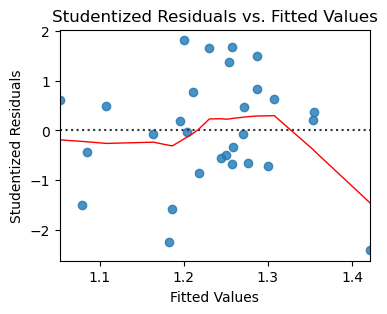

In [47]:
# Plot of studentized residuals vs. fitted values
plt.figure(figsize=(4,3))
sns.residplot(x=model.fittedvalues,
              y=studentized_residuals,
              lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

### Interpretation - Fit Plot
The residuals vs. fitted values plot shows the distribution of residuals becoming smaller as we move toward the right of the plot, with the exception of one point at the lower right corner. The red line also starts to have a downward trajectory toward the right of the plot. This behavior is potentially indicative of heteroscedasticity. The error variance may not be evenly distributed, violating the fundamental assumption of equal variance. Variable transformations are one way to address heteroscedasticity.

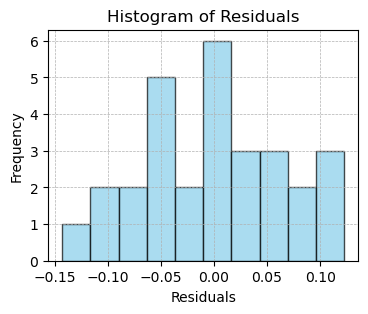

In [48]:
# Histogram of residuals
plt.figure(figsize=(4,3))
plt.hist(model.resid, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Histogram
The histogram of residuals appears to be roughly normal, but there does appear to be a slight left skew to the data. This behavior could be due to the influence of outliers. Overall, the assumption of normality may hold true, but it is not as definitive as we would like.

<Figure size 400x300 with 0 Axes>

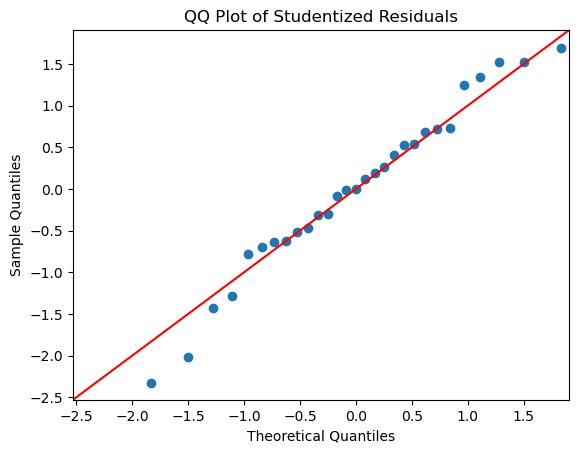

In [49]:
# QQ Plot
plt.figure(figsize=(4,3))
sm.qqplot(studentized_residuals, line='45', fit=True)
plt.title('QQ Plot of Studentized Residuals')
plt.show()

### Interpretation - QQ Plot
The QQ plot shows the formation of a relatively straight line by the points, providing additional evidence to support the assumption of normality.

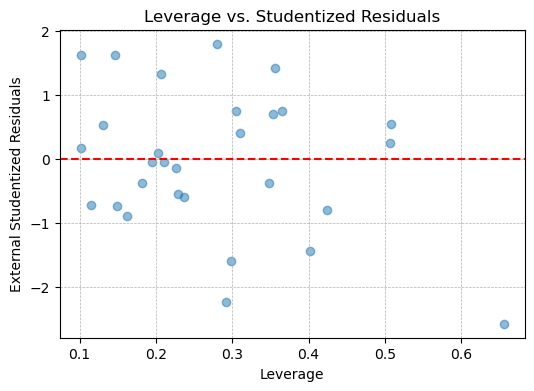

In [50]:
# Leverage vs. Residuals Plot
leverage = model.get_influence().hat_matrix_diag

plt.figure(figsize=(6, 4))
plt.scatter(leverage, studentized_residuals, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('External Studentized Residuals')
plt.title('Leverage vs. Studentized Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

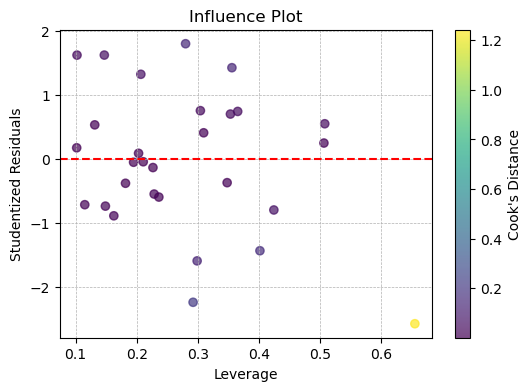

In [51]:
# Influence Plot
cooks_d = model.get_influence().cooks_distance[0]

plt.figure(figsize=(6, 4))
plt.scatter(leverage, studentized_residuals, c=cooks_d, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cook's Distance")
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Influence Plot')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Leverage & Influence Plots
The two plots above show that there is at least one noticeably high leverage/influential point (in the bottom right corner of the plot). This observation may be unduly influencing the regression fit.

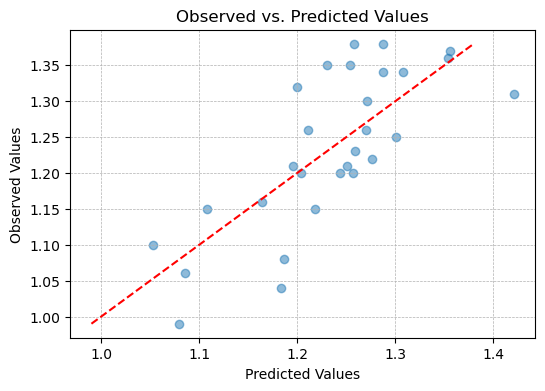

In [52]:
# Plot of Response vs. Predicted Values
predicted_values = model.predict(X)

plt.figure(figsize=(6, 4))
plt.scatter(predicted_values, y, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Observed vs. Predicted Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Predicted Values Plot
The observed vs. predicted values plot shows that the points generally conform to the 45-degree line, especially in the middle of the plot. The greater deviation from the line toward the ends of the plot suggests that the model may not be capturing some patterns in the data.

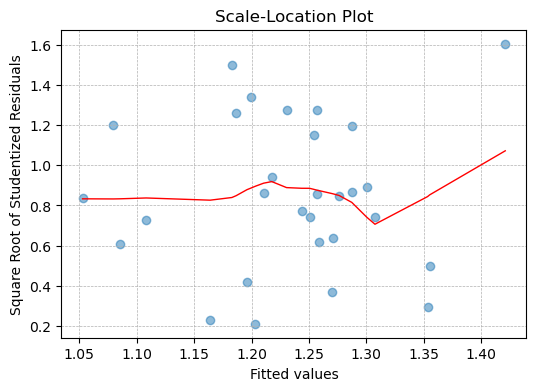

In [53]:
# Scale-Location Plot
plt.figure(figsize=(6, 4))
plt.scatter(predicted_values, np.sqrt(np.abs(studentized_residuals)), alpha=0.5)
sns.regplot(predicted_values, np.sqrt(np.abs(studentized_residuals)), scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Square Root of Studentized Residuals')
plt.title('Scale-Location Plot')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Scale-Location Plot
The square-root of studentized residuals appears to increase as the fitted values increase. This behavior is suggestive of heteroscedasticity. We have obtained further evidence that the errors do not have constant variance.

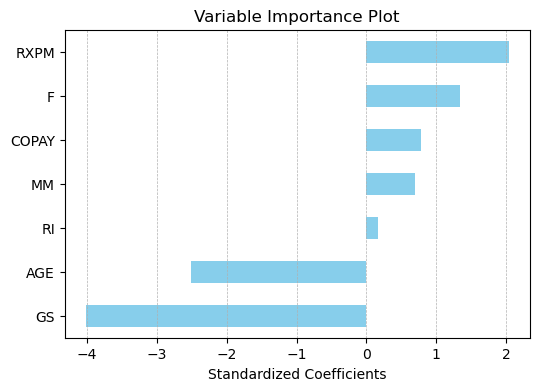

In [54]:
# Variable Importance Plot
standardized_coeffs = model.params / model.bse
standardized_coeffs = standardized_coeffs.drop('const')  # Drop the intercept

plt.figure(figsize=(6, 4))
standardized_coeffs.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Standardized Coefficients')
plt.title('Variable Importance Plot')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.show()

### Interpretation - Variable Importance
The variable importance plot visualizes the significance of the variables used for modeling. As discussed previously, the GS and AGE variables have the most significant impact on the response variable. This high importance arises from the fact that these variables are the only statistically significant predictors in our model.

# Generalized Linear Model

When instantiating our generalized linear model, we specified a Poisson model with a log link. The goal of a GLM is to allow the modeling of a linear relationship between a set of predictors and a non-Gaussian response variable (possesses a non-normal distribution). The relationship between the predictors and non-normal response variable is mediated via a link function. Applying this link function allows the resulting estimates to be scaled in a way that aligns with the observed distribution. We can then obtain the estimates in terms of their original form, which is more interpretable, by reversing the link function. GLMs may allow us to explain relationships where the response variable is not normally distributed and where the relationship between the predictors and response variable does not conform to the standard assumptions of linear modeling.

In [55]:
# Fit the GLM model
glm = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log())).fit()

# Model summary
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   COST   No. Observations:                   29
Model:                            GLM   Df Residuals:                       21
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.630
Date:                Sun, 29 Oct 2023   Deviance:                      0.12019
Time:                        04:03:11   Pearson chi2:                    0.120
No. Iterations:                     3   Pseudo R-squ. (CS):           0.005475
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7187      8.336      0.086      0.931     -15.620      17.057
RXPM           0.0188      0.120      0.157      0.876      -0.217       0.255
GS            -0.0092      0.030     -0.306      0.760      -0.068       0.050
RI             0.0003      0.023      0.011      0.991      -0.044       0.045
COPAY          0.0123      0.204      0.060      0.952      -0.388       0.412
AGE           -0.0313      0.164     -0.191      0.848      -0.352       0.289
F              0.0107      0.105      0.102      0.919      -0.195       0.217
MM          2.414e-08   4.58e-07      0.053      0.958   -8.73e-07    9.21e-07
==============================================================================
"""

### Interpretation - Summary Table
For generalized linear models, the deviance metric serves as a measure of the goodness of fit of the model. Specifically, the deviance represents the difference between the likelihood of the model and the likelihood of a perfectly fitted model with a coefficient for every observation. A low deviance of 0.12 is observed in the summary table. This suggests that the GLM has fit the data well. However, when we observe the coefficients for the predictors and their associated p-values, we see that the coefficients are all very small and the p-values are all very large, certainly greater than 0.05. This means that there are no statistically significant effects of the predictor variables on the log-relative response variable.

In [56]:
# Get predictions
y_pred_glm = glm.predict(X)

# GLM model metrics
dev_glm = glm.deviance
mse_glm = mean_squared_error(y, y_pred_glm)
rmse_glm = np.sqrt(mse_glm)
mae_glm = mean_absolute_error(y, y_pred_glm)
mape_glm = mean_absolute_percentage_error(y, y_pred_glm)
aic_glm = glm.aic
bic_glm = glm.bic
log_likelihood_glm = glm.llf

# Make a dataframe
metrics_df_glm = pd.DataFrame({
    'Metric': ['Dev', 'MSE', 'RMSE', 'MAE', 'MAPE', 'AIC', 'BIC', 'LogL'],
    'GLM Value': [dev_glm, mse_glm, rmse_glm, mae_glm, mape_glm, aic_glm, bic_glm, log_likelihood_glm]
})

metrics_df_glm

,Metric,GLM Value
0,Dev,0.120193
1,MSE,0.005093
2,RMSE,0.071364
3,MAE,0.057762
4,MAPE,0.047309
5,AIC,79.260739
6,BIC,-70.593019
7,LogL,-31.630370


In [57]:
# Side-by-side comparison of metrics
from IPython.display import display_html

def display_side_by_side(*args, space=20):
    html_str = ''
    for df in args:
        html_str += df.to_html()
        html_str += '<span style="margin-left:{}px"></span>'.format(space)
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

display_side_by_side(metrics_df_ols, metrics_df_glm)

,Metric,OLS Value
0,RSS,0.143832
1,MSE,0.004960
2,RMSE,0.070425
3,MAE,0.057781
4,MAPE,0.047362
5,AIC,-55.587277
6,BIC,-44.648910
7,LogL,35.793638
,Metric,GLM Value
0,Dev,0.120193


### Interpretation - Metrics Tables
Both models appear to have quite comparable values for their respective error metrics. Therefore, to compare the models more effectively, we will be focusing on the AIC, BIC, and log likelihood metrics. The AIC score for the GLM model is significantly higher than the AIC score for the OLS model, but the GLM model has a significantly lower BIC score than the OLS model. Both AIC and BIC are measures of the balance between goodness of fit and model complexity. BIC incorporates a stronger penalty for model complexity, however. Lower values for both metrics are preferred. Given this information, it appears that the OLS model may have a better overall balance between goodness of fit and model complexity, but when unnecessary complexity is strongly penalized, the GLM model is preferred. Based on this assessment, we may conclude that the OLS model may be the best-fitting overall, but when parsimony is an important factor, the GLM model may provide sufficiently good fit for its greater simplicity. Another metric we can use to compare the fit of the models is the log likelihood value. The higher log likelihood for the OLS model suggests that the data we have observed under the OLS model is more likely than the data we have observed under the GLM model. This is further evidence that the OLS model may fit the data better than the GLM model.

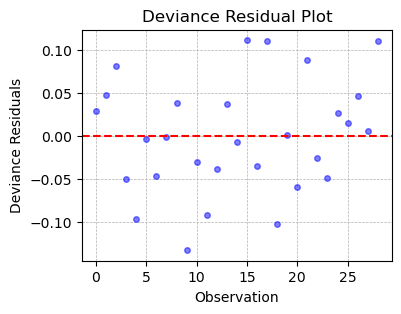

In [58]:
# Plot of deviance residuals
plt.figure(figsize=(4,3))
plt.plot(glm.resid_deviance, 'o', color='blue', alpha=0.5, markersize=4)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residual Plot')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Residual Plot
The deviance residuals appear to be roughly normally distributed around zero. This is indicative of goodness of fit.

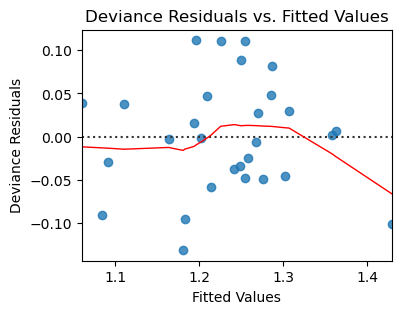

In [59]:
# Plot of deviance residuals vs. fitted values
plt.figure(figsize=(4,3))
sns.residplot(x=glm.fittedvalues,
              y=glm.resid_deviance,
              lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs. Fitted Values')
plt.show()

### Interpretation - Fit Plot
Again, the residuals appear to have less variability as the fitted values increase. The GLM model may be experiencing the same issues with capturing patterns in the data as was observed with the OLS model.

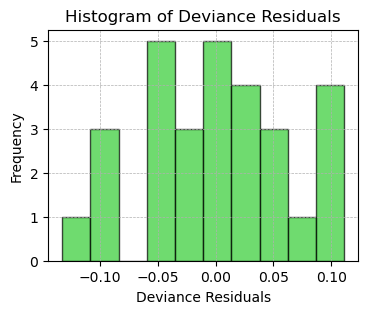

In [60]:
# Histogram of residuals
plt.figure(figsize=(4,3))
plt.hist(glm.resid_deviance, bins=10, color='limegreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Deviance Residuals')
plt.xlabel('Deviance Residuals')
plt.ylabel('Frequency')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Histogram
The histogram of deviance residuals shows that larger values are more poorly predicted by the GLM model. This is evidence by the spike in frequency toward the rightmost part of the plot.

<Figure size 400x300 with 0 Axes>

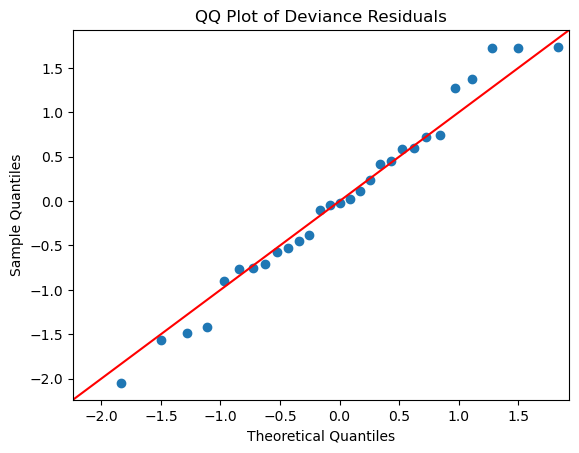

In [61]:
# QQ Plot
plt.figure(figsize=(4,3))
sm.qqplot(glm.resid_deviance, line='45', fit=True)
plt.title('QQ Plot of Deviance Residuals')
plt.show()

### Interpretation - QQ Plot
The points in the QQ plot fall closely along the red line, indicating that the model fits the data well. We cannot directly compare this visualization to the OLS QQ plot because deviance residuals and the residuals derived from an OLS model, while related, are not representative of the same measures.

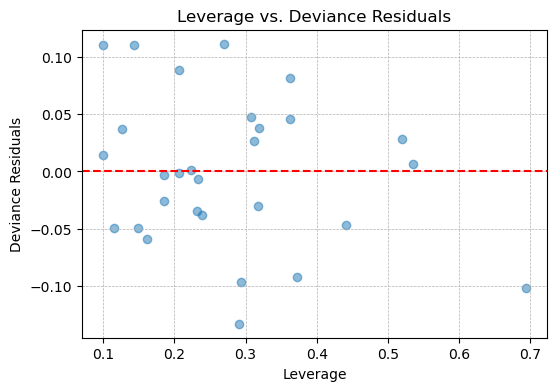

In [62]:
# Leverage vs. Residuals Plot
from statsmodels.genmod.generalized_linear_model import GLMResults

# Compute leverage
hat_matrix_diag = GLMResults.get_influence(glm).hat_matrix_diag
deviance_residuals = glm.resid_deviance

plt.figure(figsize=(6, 4))
plt.scatter(hat_matrix_diag, deviance_residuals, alpha=0.5)
plt.xlabel('Leverage')
plt.ylabel('Deviance Residuals')
plt.title('Leverage vs. Deviance Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

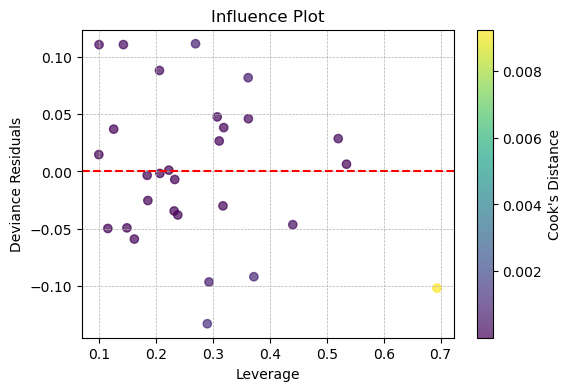

In [63]:
# Influence Plot
model_influence = GLMResults.get_influence(glm)
cooks_distance = model_influence.cooks_distance[0]

plt.figure(figsize=(6, 4))
plt.scatter(hat_matrix_diag, deviance_residuals, c=cooks_distance, cmap='viridis', alpha=0.7)
plt.colorbar(label="Cook's Distance")
plt.xlabel('Leverage')
plt.ylabel('Deviance Residuals')
plt.title('Influence Plot')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Leverage & Influence Plots
The leverage and influence plots are similar for the GLM model. There appears to be the same noticeable point in the bottom right corner of the plot that is exerting potentially undue influence on the fit of the model.

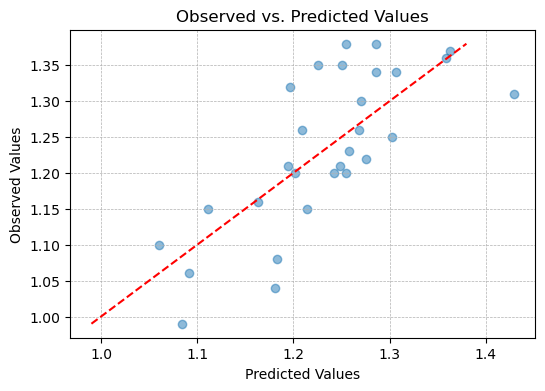

In [64]:
# Plot of Response vs. Predicted Values
plt.figure(figsize=(6, 4))
plt.scatter(glm.fittedvalues, y, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Observed vs. Predicted Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Predicted Values Plot
The points in the predicted values plot appear to cluster around the 45-degree line in a similar manner that was observed with the OLS model's plot. The points are once again more wisely dispersed around the ends of the plot, but the overall pattern appears to indicate that the model is a relatively well-fitting one.

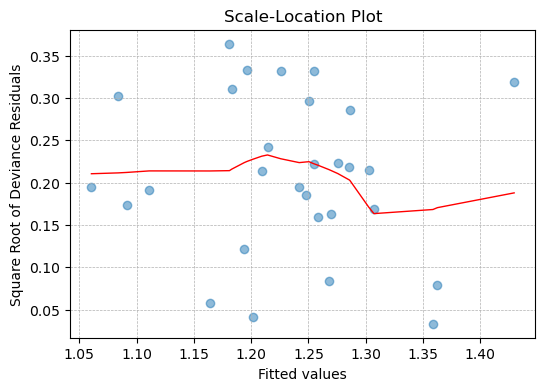

In [65]:
# Scale-Location Plot
plt.figure(figsize=(6, 4))
plt.scatter(glm.fittedvalues, np.sqrt(np.abs(deviance_residuals)), alpha=0.5)
sns.regplot(glm.fittedvalues, np.sqrt(np.abs(deviance_residuals)), scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Square Root of Deviance Residuals')
plt.title('Scale-Location Plot')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Interpretation - Scale-Location Plot
The line in the scale-location plot once again deviates toward the right of the plot. This is suggestive of potential heteroscedasticity. However, generalized linear models are not required to conform to the same assumptions as ordinary linear models, this may not be an issue for our GLM model.

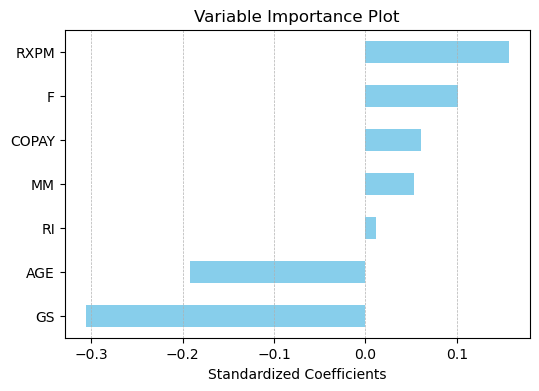

In [66]:
# Variable Importance Plot
# Standardized coefficients as substitute for importance
standardized_coeffs = glm.params / glm.bse
standardized_coeffs = standardized_coeffs.drop('const')  # Drop the intercept

plt.figure(figsize=(6, 4))
standardized_coeffs.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Standardized Coefficients')
plt.title('Variable Importance Plot')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.show()

### Interpretation - Variable Importance
The same pattern of importance can be observed for the GLM model. The variables GS and AGE were again ranked the most important relative to the other variables. These variables have the most impact on the response variable, but as the summary table showed, they may not possess statistical significance.

### Conclusion - Model Comparison
After performing the model diagnostics for the GLM model, we observed that there was not much of a difference between the two models in the observed plot results. However, the model diagnostic plots may not be the best way to compare the two models, especially considering the conceptual difference between raw residuals and deviance residuals (representative of the contribution each observation makes to the overall model deviance). Additionally, the OLS-based plots are intended to assess whether the linear model conforms to fundamental linear regression assumptions like normality, linearity, and homoscedasticity. The GLM-based plots are more focused on assessing model fit.

The diagnostic plots were not the only poor methods for comparing the models. Both the OLS and GLM models had roughly the same error metrics, such as mean squared error, mean absolute error, and mean percentage error. Given this situation, we believe that the AIC, BIC, and log likelihood scores were the most informative for comparing the fit of the two models. Ultimately, the OLS model had very low AIC and BIC scores, while the GLM model had a much higher AIC score and a lower BIC score. We interpret this to mean that the OLS model may have the best balance between model fit and model complexity. While the GLM model may be more parsimonious, as indicated by the lower BIC score which penalizes model complexity more heavily, the very high AIC score is troubling. Since the OLS model has desirable scores for both metrics, it is probably a better choice overall. Moreover, the log likelihood value is much higher with the OLS model, suggesting that the data observed under this model is more likely than the data observed under the GLM model. This is additional evidence that the OLS model fits the data better. In conclusion, based on the metrics we used to compare the models, the OLS model may be the better-fitting model.

An important caveat to issue here is that to observe greater performance with a GLM model, the model should be appropriate for the data. We used the GLM Poisson model with log link when the response variable (COST) was not a count-based variable. Poisson distributions involve counts over a fixed time period, primarily. Since we did not have the appropriate response variable distribution, we may not have observed the potential benefits of GLM modeling over OLS modeling. Understanding this, we will conduct a quick re-examination of the models with different predictor and response variables.

# Poisson Regression Redux

<AxesSubplot:>

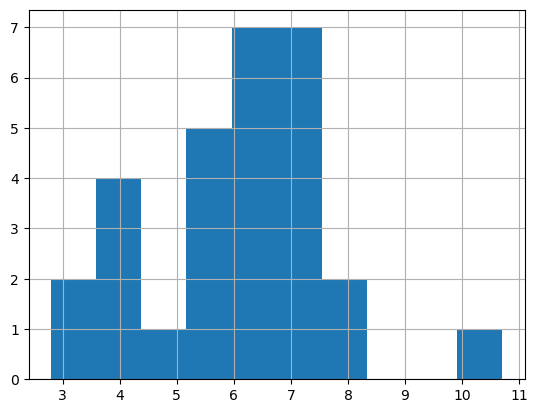

In [67]:
# Check distribution of RXPM (count variable over fixed time period)
drug_cost['RXPM'].hist()

### Interpretation - Histogram
The distribution of RXPM appears to be roughly normal. This does not make it the best candidate for a Poisson-based model as Poisson distributions are typically right-skewed, but we will proceed with the modeling process nonetheless.

In [68]:
# Correlations by RXPM
corr_rxpm = corr_matrix['RXPM']

# Sorted by absolute magnitude
sorted_corr = corr_rxpm.iloc[corr_rxpm.abs().argsort()[::-1]]
sorted_corr

RXPM     1.000000
AGE      0.259938
GS       0.259519
COPAY   -0.183411
F       -0.116373
RI       0.101041
MM       0.022899
COST     0.016223
Name: RXPM, dtype: float64

### Interpretation - Correlations
We chose RXPM as the new response variable because it represents a count within a fixed period of time. The three variables that are most strongly associated with RXPM are: AGE, GS, and COPAY. We will use these three as the predictors in our subsequent models.

In [69]:
# OLS model
X_new = drug_cost[['AGE', 'GS', 'COPAY']]
X_new = sm.add_constant(X_new)

y_new = drug_cost['RXPM']

ols_new = sm.OLS(y_new, X_new).fit()

y_pred_ols_new = ols_new.predict(X_new)

print(f'OLS MSE Value: {mean_squared_error(y_new, y_pred_ols_new)}')
print(f'OLS AIC Score: {ols_new.aic}')
print(f'OLS BIC Score: {ols_new.bic}')
print(f'OLS Log Likelihood: {ols_new.llf}')

OLS MSE Value: 2.141411949453079
OLS AIC Score: 112.38093155291179
OLS BIC Score: 117.85011487285769
OLS Log Likelihood: -52.190465776455895


In [70]:
# GLM model
glm_new = sm.GLM(y_new, X_new, family=sm.families.Poisson(link=sm.families.links.log())).fit()

y_pred_glm_new = glm_new.predict(X_new)

print(f'GLM MSE Value: {mean_squared_error(y_new, y_pred_glm_new)}')
print(f'GLM AIC Score: {glm_new.aic}')
print(f'GLM BIC Score: {glm_new.bic}')
print(f'GLM Log Likelihood: {glm_new.llf}')

GLM MSE Value: 2.166851188171086
GLM AIC Score: 123.45145025342232
GLM BIC Score: -73.54844858924645
GLM Log Likelihood: -57.72572512671116


### Results of the Rematch
In this second round of analysis, we will only discuss the metrics that we have identified to be the most meaningful for model comparison. The OLS and GLM models have comparable AIC scores, but the GLM model has a significantly lower BIC score. This suggests that the GLM model has comparable goodness of fit relative to OLS model while being significantly less complex. This combination of comparable goodness of fit and enhanced parsimony makes the GLM model the most optimal model for the data we used in the second round. The log likelihood values and mean squared errors are comparable for both models, indicating similar levels of fit. Ultimately, while both models display comparable goodness of fit, the GLM model may provide the same fit with more simplicity. Consequently, the GLM model is the more preferred model in this scenario. Performing the modeling comparison again with a more appropriate response variable and better predictor variables was an informative exercise that highlighted the importance of using advanced regression techniques under the proper context. The value of GLM models was certainly validated when the circumstances were more suitable for this type of regression.

# Scatterplots with Linear and Log Scales

In [71]:
# View the data again
un_study.head()

,Fertility,PPgdp,LogFertility,LogPPgdp
0,6.80,98,1.916923,4.584967
1,2.28,1317,0.824175,7.183112
2,2.80,1784,1.029619,7.486613
3,7.20,739,1.974081,6.605298
4,2.44,7163,0.891998,8.876684


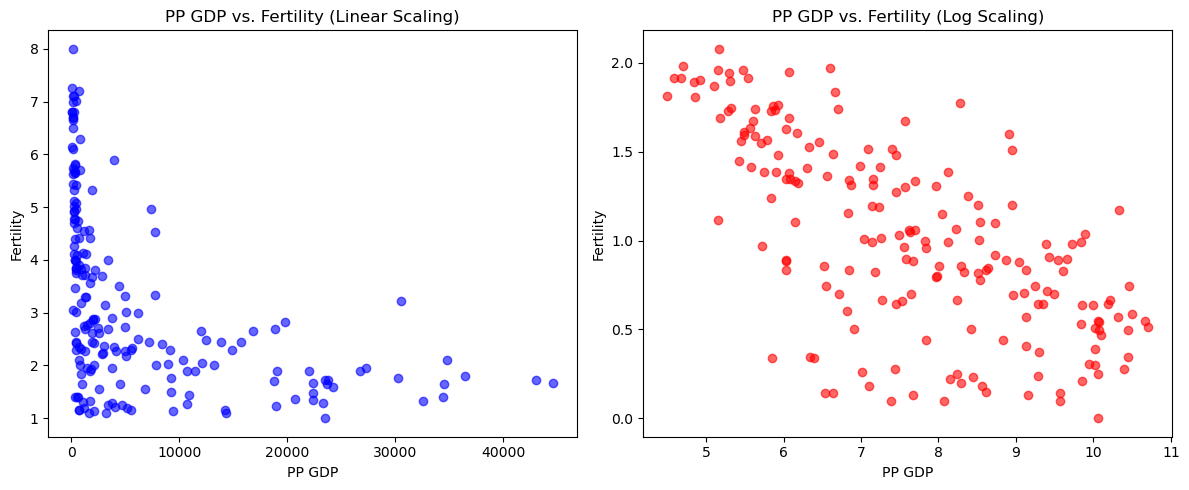

In [72]:
# Create scatterplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatterplot with linear scaling
ax[0].scatter(un_study['PPgdp'], un_study['Fertility'], color='blue', alpha=0.6)
ax[0].set_title('PP GDP vs. Fertility (Linear Scaling)')
ax[0].set_xlabel('PP GDP')
ax[0].set_ylabel('Fertility')

# Scatterplot with log scaling
ax[1].scatter(un_study['LogPPgdp'], un_study['LogFertility'], color='red', alpha=0.6)
ax[1].set_title('PP GDP vs. Fertility (Log Scaling)')
ax[1].set_xlabel('PP GDP')
ax[1].set_ylabel('Fertility')

plt.tight_layout()
plt.show()

### Interpretation - Scatterplots
The scatterplot of PP GDP vs. Fertility appears to show a relatively weak relationship between the two variables. The relationship is also an inverse one. As PP GDP rises, Fertility tends to decrease. Individuals who live in wealthier nations (if PP GDP represents per person GDP) may tend to produce less offspring (if this is indeed how fertility is being measured). The relationship appears to be stronger and more linear when both variables are transformed via a log transformation. This relationship between the log variables is less interpretable, but it is likely more useful for the purpose of linear regression.

# Linear Regression with Linear and Log Data

## Model with Linear Data

In [73]:
import statsmodels.formula.api as smf

# Define the formula
formula = 'Fertility ~ PPgdp'

# Fit the model
linear = smf.ols(formula=formula, data=un_study).fit()

# Model summary
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     52.22
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.15e-11
Time:                        04:03:14   Log-Likelihood:                -354.41
No. Observations:                 193   AIC:                             712.8
Df Residuals:                     191   BIC:                             719.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7333      0.133     28.040      0.000       3.471       3.996
PPgdp      -8.486e-05   1.17e-05     -7.226      0.000      -0.000   -6.17e-05
==============================================================================
Omnibus:                        9.811   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.371
Skew:                           0.548   Prob(JB):                      0.00560
Kurtosis:                       2.704   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
# ANOVA table
anova_lin = sm.stats.anova_lm(linear, typ=2)
anova_lin

,sum_sq,df,F,PR(>F)
PPgdp,121.588365,1.0,52.222198,1.154603e-11
Residual,444.703183,191.0,NaN,NaN


### Interpretation - Summary Table
The model using the original data resulted in an R-squared value of 0.215 and an adjusted R-squared value of 0.211. The model based on the original PP GDP variable is able to explain a little over 21% of the variability in Fertility. The p-value for the PP GDP coefficient is under 0.05, allowing us to reject the null hypothesis that this variable has no effect on Fertility. The coefficient of the predictor is very small, indicating that a one-unit change in PP GDP does not alter the value of Fertility much. In sum, PP GDP has a statistically significant effect on the response variable, Fertility. And while the variability explained by the variability in PP GDP is small, this is a pretty decent amount given that we have only included one variable in our model.

## Model with Log Data

In [75]:
# Define the formula
formula_log = 'LogFertility ~ LogPPgdp'

# Fit the model
log = smf.ols(formula=formula_log, data=un_study).fit()

# Model summary
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogFertility   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           2.73e-27
Time:                        04:03:14   Log-Likelihood:                -94.158
No. Observations:                 193   AIC:                             192.3
Df Residuals:                     191   BIC:                             198.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7032      0.135     19.968      0.000       2.436       2.970
LogPPgdp      -0.2212      0.017    -12.734      0.000      -0.255      -0.187
==============================================================================
Omnibus:                       15.343   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.598
Skew:                          -0.693   Prob(JB):                     0.000249
Kurtosis:                       3.379   Cond. No.                         37.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# ANOVA table
anova_log = sm.stats.anova_lm(log, typ=2)
anova_log

,sum_sq,df,F,PR(>F)
LogPPgdp,25.451244,1.0,162.145973,2.731002e-27
Residual,29.980317,191.0,NaN,NaN


### Interpretation - Summary Table
The model using the log-transformed data resulted in an R-squared value of 0.459 and an adjusted R-squared value of 0.456. Variability in the log-transformed PP GDP variable is able to explain a little over 45% of the variability in the Log Fertility variable. The coefficient for the Log PP GDP variable is -0.22, indicating that each one-unit increase in the Log PP GDP variable results in a 0.22 unit decrease in the Log Fertility variable. Furthermore, the coefficient p-value is statistically significant at the 0.05 level. We can reject the null hypothesis that Log PP GDP has no statistically significant effect on Log Fertility. Ultimately, the log transformations resulted in a relationship that was more conducive to linear regression. The subsequent linear model was able to capture more of the underlying patterns in the data than the model based on the original variables.

### Conclusion - Assessing Best Fit
Given that the variability explained by the log-transformation-based model was more than double the amount explained by the original-variable-based model, we believe that the log-based model is the superior model in terms of fit. Other metrics that support this conclusion include the AIC and BIC scores, which are significantly lower for the log-based model. These lower scores suggest that the log-based model is better-fitting and potentially more parsimonious than the model based on the original variables.